<a href="https://colab.research.google.com/github/satyaharika-70/ybi/blob/main/sybiproject_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand Written Digit Prediction - Classification Analysis
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each
image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

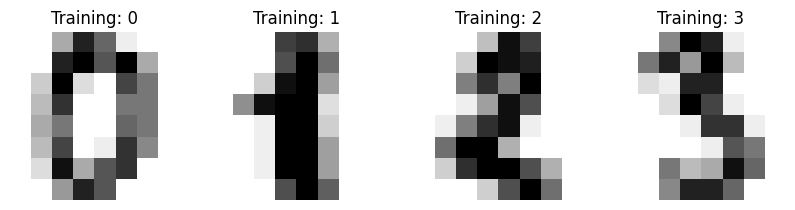

In [2]:
from sklearn.datasets import load_digits
df=load_digits()
_, axes =plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

Data Preprocessing

In [3]:
df.images.shape

(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [6]:
len(df.images)

1797

In [7]:
n_samples=len(df.images)
data= df.images.reshape((n_samples,-1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
data[0].shape

(64,)

In [9]:
data.shape

(1797, 64)

Scaling Image Data

In [10]:
data.min()

0.0

In [11]:
data.max()

16.0

In [12]:
data = data/16

In [13]:
data.min()

0.0

In [14]:
data.max()

1.0

In [15]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train_Test_Split_Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data, df.target, test_size=0.3)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Mode

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict Test Data


In [18]:
y_pred = rf.predict(X_test)
y_pred

array([4, 5, 1, 3, 4, 5, 7, 5, 4, 8, 6, 6, 5, 6, 1, 7, 7, 5, 9, 0, 7, 6,
       4, 8, 6, 4, 3, 4, 8, 3, 5, 5, 5, 3, 7, 0, 7, 6, 5, 5, 1, 8, 5, 9,
       0, 4, 6, 9, 2, 3, 8, 8, 5, 4, 9, 4, 0, 6, 3, 3, 8, 1, 1, 6, 2, 3,
       2, 9, 4, 9, 2, 5, 6, 3, 0, 2, 3, 7, 2, 8, 6, 0, 6, 6, 7, 3, 2, 0,
       5, 7, 6, 6, 4, 7, 4, 9, 0, 3, 6, 2, 6, 5, 7, 3, 0, 9, 9, 5, 7, 2,
       9, 5, 9, 4, 4, 4, 0, 9, 0, 5, 2, 8, 4, 5, 9, 7, 1, 0, 0, 8, 7, 1,
       7, 2, 0, 4, 9, 8, 6, 3, 4, 4, 5, 4, 4, 4, 9, 5, 1, 3, 9, 5, 5, 2,
       7, 5, 7, 8, 0, 6, 7, 1, 3, 0, 0, 4, 4, 5, 3, 1, 6, 5, 6, 6, 8, 4,
       9, 1, 5, 6, 4, 9, 7, 0, 7, 7, 5, 3, 4, 0, 3, 3, 9, 6, 1, 1, 8, 7,
       0, 2, 9, 7, 5, 5, 7, 1, 6, 4, 8, 8, 3, 9, 9, 9, 4, 8, 8, 6, 6, 8,
       7, 4, 1, 3, 0, 9, 4, 0, 9, 2, 6, 1, 7, 3, 2, 4, 5, 6, 7, 2, 7, 9,
       0, 5, 9, 1, 7, 3, 2, 1, 8, 5, 7, 0, 2, 6, 4, 2, 8, 3, 9, 3, 6, 3,
       9, 0, 7, 6, 1, 5, 8, 6, 0, 8, 2, 3, 8, 3, 6, 0, 2, 8, 3, 4, 0, 6,
       7, 7, 8, 9, 3, 5, 1, 4, 7, 9, 2, 4, 8, 9, 8,

Model Accuracy

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_test,y_pred)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 63,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  1, 53,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 56]])

In [20]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      1.00      0.96        38
           2       0.98      1.00      0.99        42
           3       0.98      0.95      0.97        59
           4       1.00      0.98      0.99        64
           5       0.98      0.95      0.97        61
           6       0.98      0.98      0.98        59
           7       0.95      1.00      0.97        52
           8       0.98      0.93      0.95        57
           9       0.95      0.97      0.96        58

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.97      0.97      0.97       540

